### Importing the Libraries:

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data:

In [2]:
data = read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### EDA:

In [3]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

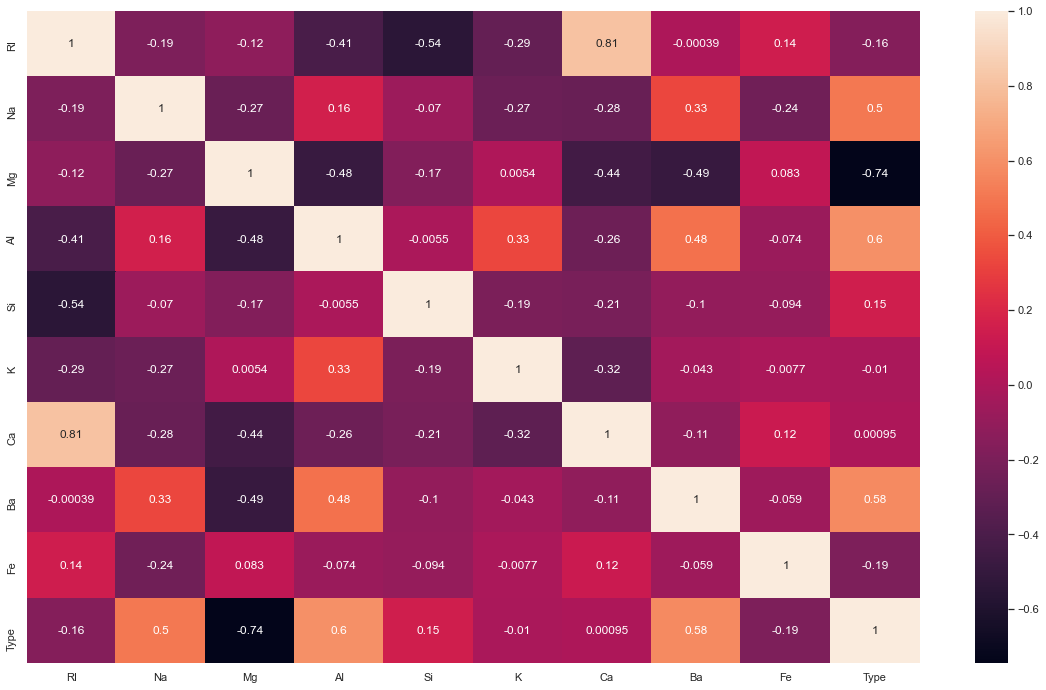

In [41]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(data.corr(), annot=True)

### Preprocessing the data:

In [5]:
array = data.values
X = array[:,1:9]
Y = array[:,9]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [9]:
y_test = y_test.astype(int)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building the KNN model:

In [42]:
# Checking the square root of the length of the y_test to use the closest odd number as the value of K
np.sqrt(len(y_test))

6.557438524302

In [30]:
# Finding how many categories are there in the y variable
total_types = len(data.Type.unique())
total_types
data.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [24]:
model = KNeighborsClassifier(n_neighbors=5, p=total_types, metric="euclidean")

In [25]:
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', p=6)

### Accuracy:

In [27]:
print(f"Accuracy: {round(model.score(X_test,y_test) * 100, 2)}%")

Accuracy: 60.47%


In [28]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm)

In [29]:
cm

,0,1,2,3,4,5
0,12,4,1,0,0,0
1,5,9,0,1,0,0
2,2,1,0,0,0,0
3,0,3,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,3


### Grid Search for Algorithm Tuning:

In [31]:
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [33]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [45]:
print(f"The best score is: {grid.best_score_}\nThe best value for K is: {grid.best_params_}")

The best score is: 0.640531561461794
The best value for K is: {'n_neighbors': 1}


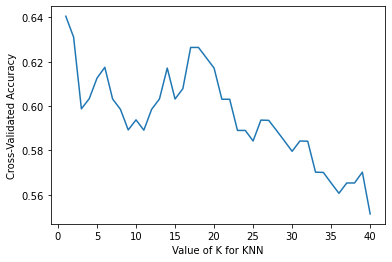

In [37]:
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

###### Observation: We can see that the optimal number of K is 1

### Building a model with K as 1:

In [50]:
model_new = KNeighborsClassifier(n_neighbors=1, p=total_types, metric="euclidean")
model_new.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=6)

In [51]:
print(f"Accuracy: {round(model_new.score(X_test,y_test) * 100, 2)}%")

Accuracy: 67.44%


In [52]:
y_pred = model_new.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

,0,1,2,3,4,5
0,14,2,1,0,0,0
1,3,8,3,0,1,0
2,2,1,0,0,0,0
3,0,1,0,3,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,3


###### Observation: The previous model gave us 60.47% accuracy and the new model with the optimum value of K = 1 gives us the accuracy of 67.44%